In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import ast


In [36]:
programms_df = pd.read_csv('data//degrees/programme_data_NDC.csv')
modules_df  = pd.read_csv('data//modules/modul_key_facts_updated.csv')


In [38]:
programms_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   degree           42 non-null     object 
 1   a_lvl_req        42 non-null     object 
 2   a_lvl_extra      25 non-null     object 
 3   modules_y1       42 non-null     object 
 4   modules_y2       42 non-null     object 
 5   modules_y3       42 non-null     object 
 6   nr_applications  40 non-null     float64
 7   intake           40 non-null     object 
 8   ratio            40 non-null     object 
 9   home_fee         41 non-null     object 
 10  median_salary    39 non-null     object 
dtypes: float64(1), object(10)
memory usage: 3.7+ KB


In [40]:
modules_df.head(3)


,code,course,department,total_students,avg_class_size,capped,units
0,AC102,Elements of Financial Accounting,Accounting,564.0,15.0,False,0.5
1,AC103,"Elements of Management Accounting, Financial M...",Accounting,256.0,18.0,False,0.5
2,AC105,Introduction to Financial Accounting,Accounting,115.0,39.0,False,0.5


In [42]:
modules_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   code            566 non-null    object 
 1   course          566 non-null    object 
 2   department      566 non-null    object 
 3   total_students  466 non-null    float64
 4   avg_class_size  459 non-null    float64
 5   capped          566 non-null    object 
 6   units           566 non-null    float64
dtypes: float64(3), object(4)
memory usage: 31.1+ KB


In [44]:
module_units_dict = modules_df.set_index('code')['units'].to_dict()

print("First 5 items in module_units_dict:")
print(dict(itertools.islice(module_units_dict.items(), 5)))

print(f"\nTotal modules in dictionary: {len(module_units_dict)}")

First 5 items in module_units_dict:
{'AC102': 0.5, 'AC103': 0.5, 'AC105': 0.5, 'AC106': 0.5, 'AC205': 0.5}

Total modules in dictionary: 566


In [46]:
programms_df_clean = programms_df.copy()
programms_df_clean.dropna(subset=['median_salary'], inplace=True)

print("Remaining missing values:\n", programms_df_clean.isnull().sum())

Remaining missing values:
 degree              0
a_lvl_req           0
a_lvl_extra        16
modules_y1          0
modules_y2          0
modules_y3          0
nr_applications     2
intake              2
ratio               2
home_fee            0
median_salary       0
dtype: int64


In [48]:
programms_df_clean['intake_num'] = (
    programms_df_clean['intake']
      .str.replace(r'[^0-9.]', '', regex=True)
      .replace('', np.nan)
      .astype(float)
)

programms_df_clean['apps_num'] = (
    programms_df_clean['nr_applications']
      .astype(str)
      .str.replace(r'[^0-9.]', '', regex=True)
      .replace('', np.nan)
      .astype(float)
)

programms_df_clean['acceptance_perc'] = (
    programms_df_clean['intake_num'] 
      / programms_df_clean['apps_num']
).round(5)

programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary,intake_num,apps_num,acceptance_perc
0,BA Anthropology and Law,AAB,NaN,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20,13:1,"£9,535","£34,500",20.0,250.0,0.08000
1,BA Geography,AAA,NaN,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212']",['GY350'],377.0,38,10:1,"£9,535","£35,000",38.0,377.0,0.10080
2,BA History,AAA,NaN,"['HY120', 'LSE100']",[],['HY300'],503.0,58,9:1,"£9,535","£35,000",58.0,503.0,0.11531


In [50]:
programms_df_clean['median_salary'] = (
    programms_df_clean['median_salary']
      .astype(str)                           
      .str.replace(r'[\£,]', '', regex=True) 
      .replace('', np.nan)        
      .astype(float) )

top10 = (
    programms_df_clean[['degree','median_salary']]
      .nlargest(5, 'median_salary')
      .reset_index(drop=True)
)

bot10 = (
    programms_df_clean[['degree','median_salary']]
      .nsmallest(5, 'median_salary')
      .reset_index(drop=True)
)

pd.concat([top10, bot10], axis=1, keys=['Top 5','Bottom 5'])


Top 5                \
                                        degree median_salary   
0                                  BSc Finance       65000.0   
1  BSc Econometrics and Mathematical Economics       55000.0   
2                                BSc Economics       55000.0   
3     BSc Financial Mathematics and Statistics       40000.0   
4                BSc Mathematics and Economics       40000.0   

                                            Bottom 5                
                                              degree median_salary  
0                        BSc International Relations       27500.0  
1                                      BSc Sociology       30000.0  
2         BSc International Social and Public Policy       32000.0  
3  BSc International Social and Public Policy wit...       32000.0  
4                            BA Anthropology and Law       34500.0

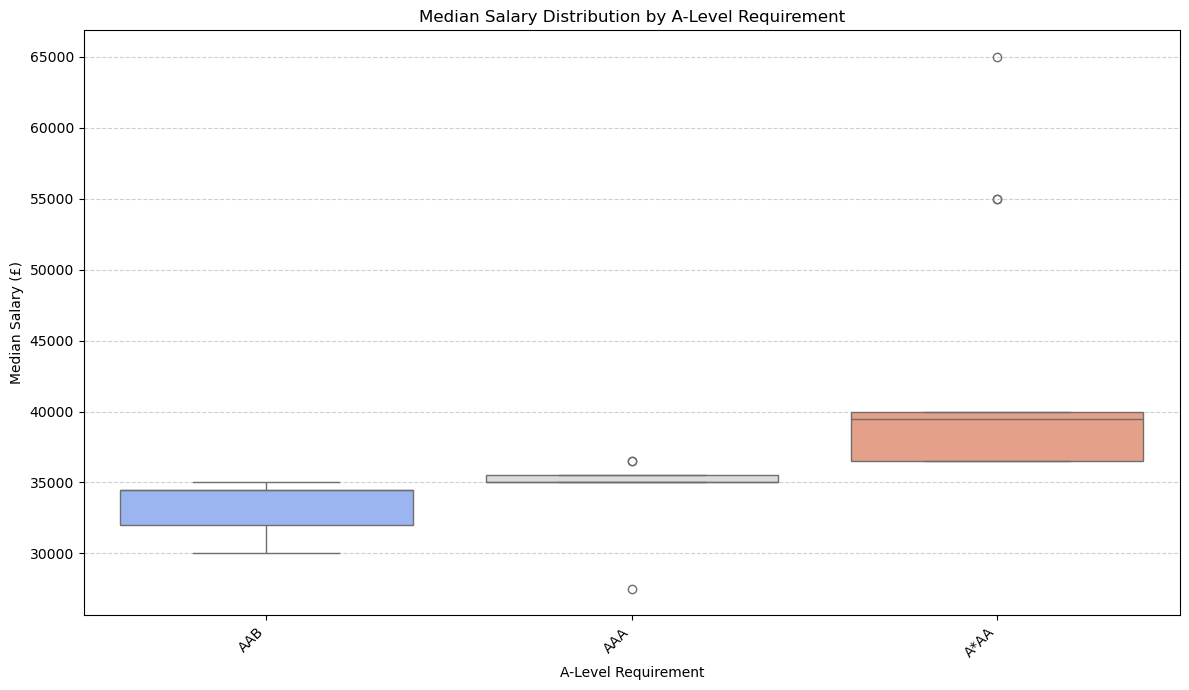

In [52]:
requirement_order = sorted(programms_df_clean['a_lvl_req'].unique(), reverse=True)

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=programms_df_clean,
    x='a_lvl_req', y='median_salary',
    order=requirement_order,
    palette='coolwarm',
    hue='a_lvl_req',
    legend=False
)

plt.title('Median Salary Distribution by A-Level Requirement')
plt.xlabel('A-Level Requirement')
plt.ylabel('Median Salary (£)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


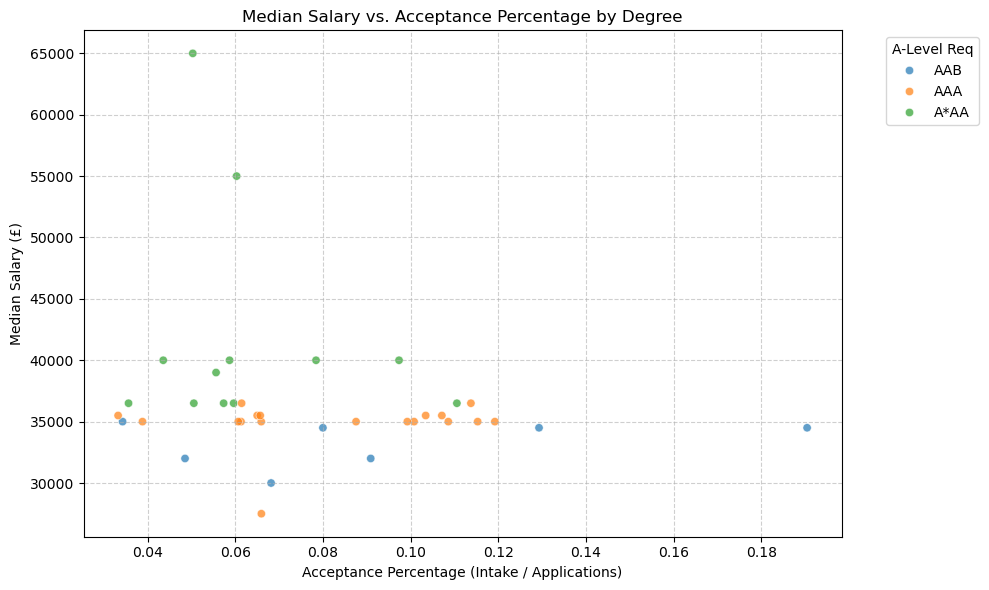

Correlation between Acceptance Percentage and Median Salary: -0.19


In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=programms_df_clean,
    x='acceptance_perc', y='median_salary',
    hue='a_lvl_req', alpha=0.7
)

plt.title('Median Salary vs. Acceptance Percentage by Degree')
plt.xlabel('Acceptance Percentage (Intake / Applications)')
plt.ylabel('Median Salary (£)')
plt.grid(linestyle='--', alpha=0.6)
plt.legend(title='A-Level Req', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

correlation = programms_df_clean['acceptance_perc'] \
                  .corr(programms_df_clean['median_salary'])
print(f"Correlation between Acceptance Percentage and Median Salary: {correlation:.2f}")


In [55]:
def parse_module_list(module_string):
    try:
        if isinstance(module_string, str):
            parsed = ast.literal_eval(module_string)
            return parsed if isinstance(parsed, list) else []
        elif isinstance(module_string, list):
            return module_string
        else:
            return []
    except (ValueError, SyntaxError, TypeError):
        return []

programms_df_clean['modules_y1'] = programms_df_clean['modules_y1'] \
                                     .apply(parse_module_list)
programms_df_clean['modules_y2'] = programms_df_clean['modules_y2'] \
                                     .apply(parse_module_list)
programms_df_clean['modules_y3'] = programms_df_clean['modules_y3'] \
                                     .apply(parse_module_list)

programms_df_clean.head(3)


,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary,intake_num,apps_num,acceptance_perc
0,BA Anthropology and Law,AAB,NaN,"[LL141, AN100, AN101, LL142, LL108, LL100, LL1...","[AN253, AN379, LL106, LL143, LL200]",[LL276],250.0,20,13:1,"£9,535",34500.0,20.0,250.0,0.08000
1,BA Geography,AAA,NaN,"[GY100, GY140, GY144, LSE100]","[GY245, GY246, GY212]",[GY350],377.0,38,10:1,"£9,535",35000.0,38.0,377.0,0.10080
2,BA History,AAA,NaN,"[HY120, LSE100]",[],[HY300],503.0,58,9:1,"£9,535",35000.0,58.0,503.0,0.11531


In [71]:
def calculate_total_units(df, module_col_name, units_dict):
    total_units_list = []
    warnings_issued = set()

    for modules in df[module_col_name]:
        unit_sum = 0
        if isinstance(modules, list):
            for m in modules:
                val = units_dict.get(m, 0)
                if m not in units_dict and m not in warnings_issued:
                    print(f"Warning: Module '{m}' not found in dictionary.")
                    warnings_issued.add(m)
                unit_sum += val
        total_units_list.append(unit_sum)

    return total_units_list

y1 = calculate_total_units(programms_df_clean, 'modules_y1', module_units_dict)
programms_df_clean['y1_compulsory_units'] = y1

y2 = calculate_total_units(programms_df_clean, 'modules_y2', module_units_dict)
programms_df_clean['y2_compulsory_units'] = y2

y3 = calculate_total_units(programms_df_clean, 'modules_y3', module_units_dict)
programms_df_clean['y3_compulsory_units'] = y3

programms_df_clean[['degree','y1_compulsory_units','y2_compulsory_units','y3_compulsory_units']].head()



,degree,y1_compulsory_units,y2_compulsory_units,y3_compulsory_units
0,BA Anthropology and Law,4.5,3.0,1.0
1,BA Geography,3.5,1.5,1.0
2,BA History,1.5,0.0,1.0
3,BA Social Anthropology,3.5,1.0,1.0
4,BSc Accounting and Finance,2.5,1.0,2.0


In [83]:
programms_df_clean['total_compulsory_units'] = ( programms_df_clean['y1_compulsory_units'] + programms_df_clean['y2_compulsory_units'] + programms_df_clean['y3_compulsory_units'])


programms_df_clean['total_optional_units'] = 12.5 - programms_df_clean['total_compulsory_units']

top5_optional = (programms_df_clean[['degree', 'total_optional_units']].nlargest(5, 'total_optional_units').reset_index(drop=True))
bot5_optional = (programms_df_clean[['degree', 'total_optional_units']].nsmallest(5, 'total_optional_units').reset_index(drop=True))

pd.concat([top5_optional, bot5_optional], axis=1, keys=['Top 5 Optional Units', 'Bottom 5 Optional Units'])


Top 5 Optional Units                       \
                                    degree total_optional_units   
0  BSc International Relations and History                 11.0   
1                               BA History                 10.0   
2                 BSc History and Politics                 10.0   
3              BSc International Relations                 10.0   
4                             BSc Politics                 10.0   

                     Bottom 5 Optional Units                       
                                      degree total_optional_units  
0                                BSc Finance                  2.0  
1   BSc Financial Mathematics and Statistics                  2.0  
2  BSc Psychological and Behavioural Science                  3.5  
3                    BA Anthropology and Law                  4.0  
4         BSc Economic History and Geography                  4.0